In [2]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
%config InlineBackend.figure_format = 'retina'

In [3]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [4]:
exp1 = np.fromfile('/Volumes//platonov//Figures+data//2d.txt',dtype=float,count=-1, sep=" ")
#exp2 = np.fromfile('D://m.dat',dtype=float,count=-1, sep=" ")
#exp4 = np.fromfile('D://qpc.dat',dtype=float,count=-1, sep=" ")

In [5]:
#exp4 = np.reshape(exp4, (-1, 3))
#exp4=np.transpose(exp4)

In [6]:
exp1 = np.reshape(exp1, (461, -1))
#exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
#exp1=np.transpose(exp1)
#exp2 = np.reshape(exp2, (161, 201))


In [7]:
exp1.shape

(461, 141)

In [8]:
exp1 = exp1[0::2,:]

In [9]:
#exp1=np.transpose(exp1)

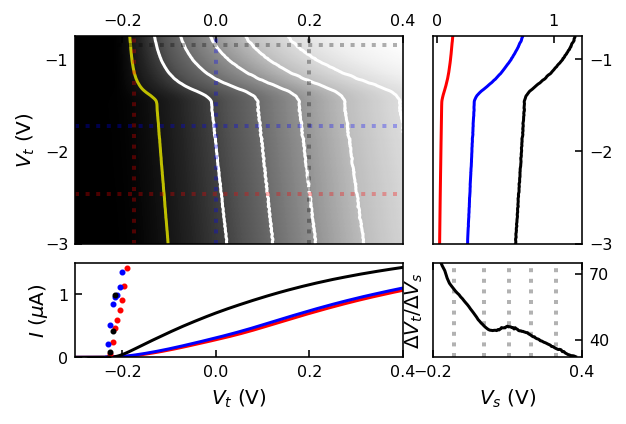

In [43]:
import matplotlib.gridspec as gridspec
x1=np.linspace(-0.75, -3, num=231)
x2=np.linspace(-0.3, 0.400, num=141)
fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0:2, 0:2])
plt.tick_params(direction='in',labelbottom=False, bottom=False,labeltop=True,top=True)
plt.yticks([-1,-2,-3],fontsize=8)
plt.xticks(fontsize=8)
plt.axhline(y=x1[100], color='b', linestyle='dotted',lw=2, alpha=0.3)
plt.axhline(y=x1[175], color='r', linestyle='dotted',lw=2, alpha=0.3)
plt.axhline(y=x1[10], color='k', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x2[100], color='k', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x2[25], color='r', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x2[60], color='b', linestyle='dotted',lw=2, alpha=0.3)
plt.ylabel("$V_t$ (V)", color='k',fontsize=10)
#plt.xlabel("$V_s$ (V)", color='k',fontsize=12)
plt.ylim(-3,-0.75)
plt.imshow(-exp1*1E6,cmap='Greys_r',extent=[-0.3,0.4,-0.75,-3],interpolation='spline36', origin="lower",aspect='auto')
###########################################################
#Contour
level0 = np.arange(0.1,0.2, 0.2)
CS = plt.contour(-exp1*1E6, level0, extent=[-0.3,0.4,-0.75,-3],inline_spacing=0, colors='y')

levels = np.arange(0.3, 1.2, 0.2)
CS = plt.contour(-exp1*1E6, levels, extent=[-0.3,0.4,-0.75,-3],inline_spacing=0, colors='w')


###########################################################
#COLORBAR

cbaxes = fig.add_axes([0.42, 0.35, 0.165, 0.02]) 

plt.text(-0.3, 0, '0',color='k', rotation=0,fontsize=8)
plt.text(1.05, 0, '1.4',color='k', rotation=0,fontsize=8)
plt.text(1.6, 0, '$I$ (nA)',color='k', rotation=0,fontsize=11)
cbar=plt.colorbar(cax=cbaxes, ticks=[], orientation='horizontal',label='')
cb=plt.colorbar(ticks=[0, 0.3, 0.7],label='I', orientation='horizontal') 
plt.colorbar()
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
 
#############################################################
#cb.set_label('$I$ ($\mu$A)', rotation=270)
ax2 = plt.subplot(gs[0:2, 2])
x1=np.linspace(-0.75, -3, num=231)
plt.plot(-exp1[:,25]*1E6,x1,'-r')
plt.plot(-exp1[:,100]*1E6,x1,'-k')
plt.plot(-exp1[:,60]*1E6,x1,'-b')
plt.ylim(-3,-0.75)
plt.tick_params(direction='in',labeltop=True, labelbottom=False, bottom=False,labelleft=False, top=True,left=False, labelright=True, right=True)
plt.yticks([-1,-2,-3],fontsize=8)
plt.xticks(fontsize=8)
#plt.yticks([0,1,2],fontsize=10)

#plt.ylabel("$I$ (nA)", color='k',fontsize=12)
#plt.ylim(0,2)
ax3 = plt.subplot(gs[2, 0:2])
x2=np.linspace(-0.300, 0.400, num=141)
plt.plot(x2,-exp1[175]*1E6,'-r')
plt.plot(x2,-exp1[100]*1E6,'-b')
plt.plot(x2,-exp1[10]*1E6,'-k')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0,1.5)
plt.xlim(-0.300,0.400)
plt.tick_params(direction='in')
#plt.yticks([0,1,2],fontsize=10)
plt.xlabel("$V_t$ (V)", color='k',fontsize=10)
plt.ylabel("$I$ ($\mu$A)", color='k',fontsize=10)
plt.plot(x2,-exp1[175]*1E6*100,'or', markersize=2)
plt.plot(x2,-exp1[100]*1E6*100,'ob',markersize=2)
plt.plot(x2,-exp1[10]*1E6*100,'ok', markersize=2)


ax4 = plt.subplot(gs[2, 2])
levels2 = np.arange(0.01, 1.2, 0.01)
plt.plot(vs[1:100],der[1:100],'-k',lw=1.5)
levels3 = np.arange(0.1, 1.3, 0.2)
for i in range(0,5):
    plt.axvline(x=vs2[i]/1000, color='k', linestyle='dotted',lw=2, alpha=0.3)


plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True,labelleft=False, top=True,left=False, labelright=True, right=True)
plt.xlim(-0.2,0.4)
plt.ylim(32,75)
plt.xticks([-0.2,0.4],fontsize=8)
plt.yticks([40,70],fontsize=8)
plt.xlabel("$V_s$ (V)", color='k',fontsize=10)
plt.ylabel("$\Delta V_t/ \Delta V_s$ ", color='k',fontsize=10)
plt.savefig('/Volumes/platonov/topgate.svg',bbox_inches='tight', format='svg',dpi=900)

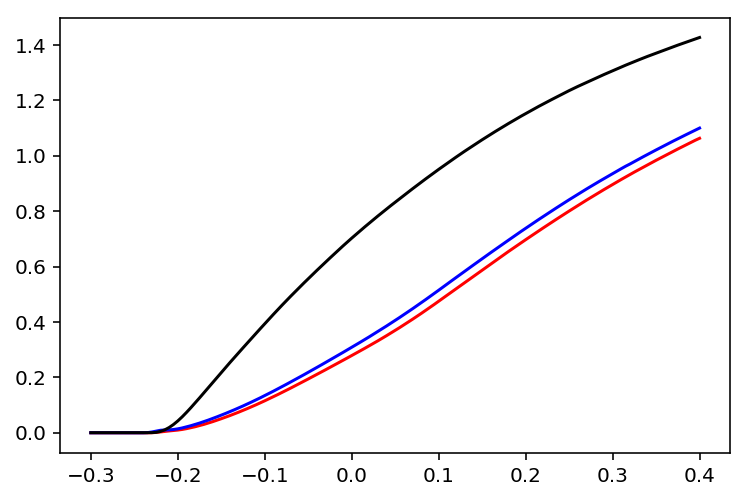

In [18]:
x2=np.linspace(-0.300, 0.400, num=141)
plt.plot(x2,-exp1[175]*1E6,'-r')
plt.plot(x2,-exp1[100]*1E6,'-b')
plt.plot(x2,-exp1[10]*1E6,'-k')

In [19]:
np.savetxt('//Volumes//platonov//y2.txt', -exp1[100]*1E6+8.5E-4, delimiter=' ')

In [32]:
x2

array([-0.3  , -0.295, -0.29 , -0.285, -0.28 , -0.275, -0.27 , -0.265,
       -0.26 , -0.255, -0.25 , -0.245, -0.24 , -0.235, -0.23 , -0.225,
       -0.22 , -0.215, -0.21 , -0.205, -0.2  , -0.195, -0.19 , -0.185,
       -0.18 , -0.175, -0.17 , -0.165, -0.16 , -0.155, -0.15 , -0.145,
       -0.14 , -0.135, -0.13 , -0.125, -0.12 , -0.115, -0.11 , -0.105,
       -0.1  , -0.095, -0.09 , -0.085, -0.08 , -0.075, -0.07 , -0.065,
       -0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035, -0.03 , -0.025,
       -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,
        0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,  0.05 ,  0.055,
        0.06 ,  0.065,  0.07 ,  0.075,  0.08 ,  0.085,  0.09 ,  0.095,
        0.1  ,  0.105,  0.11 ,  0.115,  0.12 ,  0.125,  0.13 ,  0.135,
        0.14 ,  0.145,  0.15 ,  0.155,  0.16 ,  0.165,  0.17 ,  0.175,
        0.18 ,  0.185,  0.19 ,  0.195,  0.2  ,  0.205,  0.21 ,  0.215,
        0.22 ,  0.225,  0.23 ,  0.235,  0.24 ,  0.245,  0.25 ,  0.255,
      

In [33]:
vs=x2

In [34]:
x1[175]

-2.4619565217391308

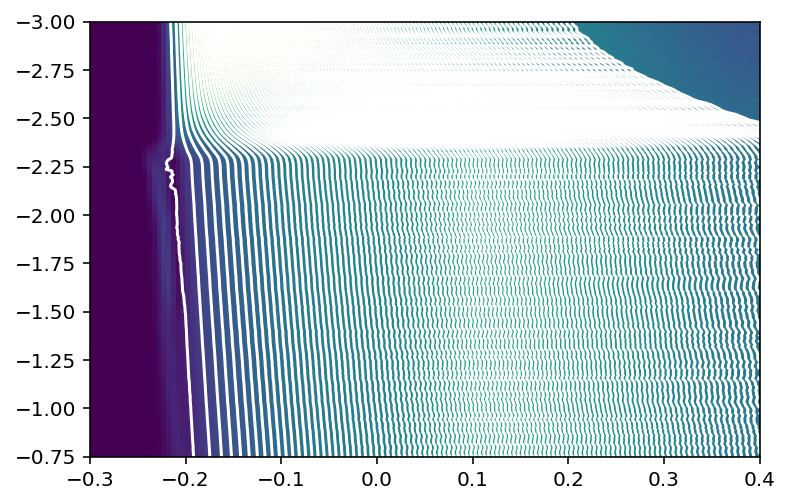

In [35]:
plt.imshow(np.abs(np.gradient(exp1)[1]),extent=[-0.300,0.400,-0.75,-3],aspect='auto')
levels = np.arange(0.01, 1.2, 0.01)
CS = plt.contour(-exp1*1E6, levels, extent=[-0.300,0.400,-3,-0.75],inline_spacing=0, colors='w')

In [36]:
vs=np.arange(0.01, 1.2, 0.01)

In [37]:
vs

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,
        1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,  1.08,
        1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,  1.17,
        1.18,  1.19])

(20, 70)

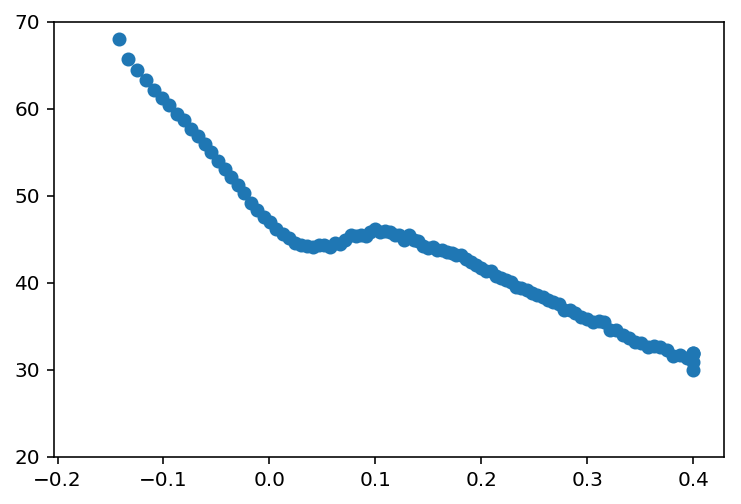

In [38]:
from scipy.interpolate import InterpolatedUnivariateSpline

# Get a function that evaluates the linear spline at any x
der=np.arange(0.01, 1.2, 0.01)

# Get a function that evaluates the derivative of the linear spline at any x

# Evaluate the derivative dydx at each x location...

for i in range(1,119):
    dat0= CS.allsegs[i][0]
    vs[i]=dat0[0,0]
    p = np.polyfit(dat0[1:100,0], dat0[1:100,1], 1)
    f = np.polyval(p,dat0[:,0]);
    dfdx = np.polyder(p,m=1);
    dydx= np.polyval(dfdx,dat0[:,0]);
    der[i]=dydx[0];
    #print p
    #dfdx = f.derivative()
    #dydx = dfdx(dat0[:,0])
    #dx=dat0[1,0]-dat0[0,0]
    #plt.plot(dat0[:,0],dydx,'ok')
    #plt.ylim(0,0.2)
    #plt.plot(dat0[:,0],f,'-')
    #plt.plot(dat0[79,0],dat0[79,1],'ok')
    #plt.ylim(-2,-0.75)
plt.plot(vs,der,'o')
#plt.xlim(0.02,1)
plt.ylim(20,70)

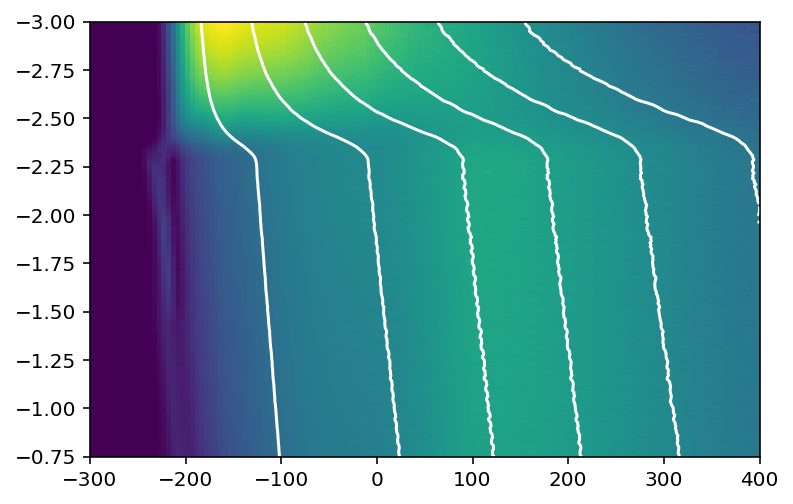

In [40]:
plt.imshow(np.abs(np.gradient(exp1)[1]),extent=[-300,400,-0.75,-3],aspect='auto')
levels3 = np.arange(0.1, 1.2, 0.2)
CS = plt.contour(-exp1*1E6, levels3, extent=[-300,400,-3,-0.75],inline_spacing=0, colors='w')
vs2=np.linspace(0,0,6)
for i in range(1,7):
    dat0= CS.allsegs[i-1][0]
    vs2[i-1]=dat0[79,0]
    


In [ ]:
vs2

In [ ]:
levels[100]

In [ ]:
plt.plot(1/np.abs(np.gradient(exp1)[0]/np.gradient(exp1)[1])[200])
plt.xlim(20,140)
plt.ylim(0,200)

In [ ]:
np.gradient(exp1)[0]